In [1]:
from IPython.display import HTML

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

# A4 - Exploratory Data Analysis

In [68]:
import numpy as np
#import plotly.plotly as py
from __future__ import division # division
import seaborn as sns # for visualiation
from scipy.stats import ttest_ind # t-tests
import statsmodels.formula.api as smf # linear modeling
import statsmodels.api as sm
#from plotly.offline import plot # import plotly to graph distributions
#import plotly.graph_objs as go
import matplotlib.pyplot as plt # plotting
import matplotlib
from sklearn import metrics
matplotlib.style.use('ggplot')
%matplotlib inline

import pandas as pd
df = pd.read_csv('./YouthTobaccoSurveyData.csv')
#df.shape

(9794, 31)

### Data Preparation

The dataset we use for research is regarding nationwide youth tobacco usage based in the United states. Given the size of the data and many missing values within the data, we decided to omit the empty cells before carrying forward our research process.  
The dataset itself has several columns, however, columns we are insterested in are _Year_, _Location_, _TopicDesc_, _MeasureDesc_, _Response_, _DataValue_, _Gender_, and _Education_, where our main dependent variable to focus on is the **DataValue**, meaning for instance the percentage of tobacco user based on the gathered sample size of youth. To genderate a more proper dataset for analysis, we drop all of the infinite values within the **DataValue** column, by doing which reduces our dataset to 9369 rows camparing to 9795 rows of the original one.  
For this particular report, we focus closely on **current tobacco user** based on year, location, and education level.

In [69]:
import plotly.plotly as py
from plotly.offline import plot
import plotly.graph_objs as go

In [192]:
# drop rows with no attribute "data_value"
df = df[np.isfinite(df['Data_Value'])]
#df.shape

In [191]:
#df.columns.tolist()

In [71]:
# select only cessation and cegarette use data from the database
new_df = df[df['TopicDesc'].isin(['Cessation (Youth)', 'Cigarette Use (Youth)'])]

### EDA: Univariate Analysis

We perform two separate plotting technique to visualize our dataset, shown as following:  

* Mean youth current tobacco usage rate based on gender through out the years available in the dataset (_States_ combined)

In [72]:
# smoking status data by states
smokingstat_df = df[df['MeasureDesc'] == "Smoking Status"]
current_smoker_df = smokingstat_df[smokingstat_df['Response'] == 'Current']
# current_smoker_df

In [174]:
# Mean Data_Value by sex & year
mean = current_smoker_df[['Gender', 'Data_Value', 'YEAR']].groupby(['Gender','YEAR']).agg('mean').reset_index()
female = current_smoker_df[['Gender', 'Data_Value', 'YEAR']].groupby(['Gender']).get_group('Female')
female_current_smoker_mean_by_year = female.groupby('YEAR').agg('mean').reset_index()
male = current_smoker_df[['Gender', 'Data_Value', 'YEAR']].groupby(['Gender']).get_group('Male')
male_current_smoker_mean_by_year = male.groupby('YEAR').agg('mean').reset_index()

In [167]:
#plt.hist(female_current_smoker_mean_by_year, alpha=0.5, label='female')
#plt.hist(male_current_smoker_mean_by_year, alpha=0.5, label='male')
#plt.show()

In [188]:
# Multiple histogram using plt
#multiple_bars = plt.figure()


#ax = plt.subplot(111)
#ax.bar(female_current_smoker_mean_by_year.YEAR, female_current_smoker_mean_by_year.Data_Value,width=0.2,color='b',align='center')
#ax.bar(male_curret_smoker_mean_by_year.YEAR, male_curret_smoker_mean_by_year.Data_Value,width=0.2,color='g',align='center')

#plt.show()

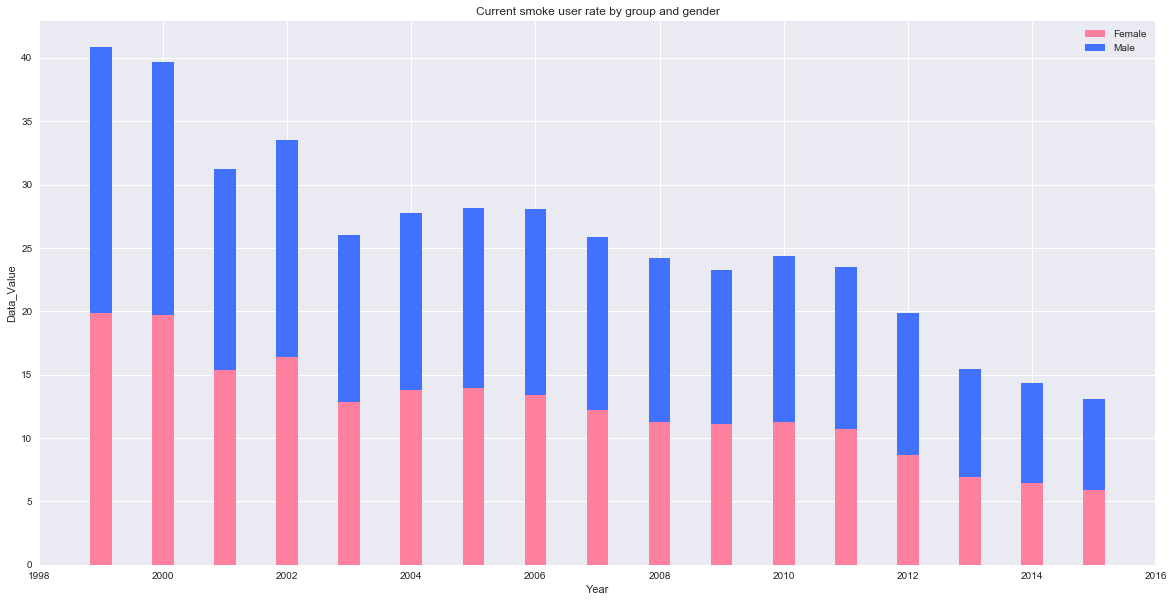

In [186]:
#import plotly.plotly as py
#import plotly.tools as tls

plt.figure(figsize=(20,10))

plt.bar(female_current_smoker_mean_by_year.YEAR, female_current_smoker_mean_by_year.Data_Value, width, 
        color=(1.0,0.5,0.62), label='Female')
plt.bar(male_current_smoker_mean_by_year.YEAR, male_current_smoker_mean_by_year.Data_Value, width, 
        color=(0.2588,0.4433,1.0), label='Male',bottom=female_current_smoker_mean_by_year.Data_Value)
plt.xlabel('Year')
plt.ylabel('Data_Value')
plt.title('Current smoke user rate by group and gender')


plt.legend(loc='upper right')
plt.show()


In [142]:
# Draw histograms for the distribution of salaries for males and females (separately)
#current_smoker_df['YEAR'].hist(by=(current_smoker_df['Gender']), sharex=True, figsize=(20,10))

In [75]:
# current high school smoker (overall) by states
c_hs_smoker = current_smoker_df[(current_smoker_df['Education'] == 'High School') & (current_smoker_df['Gender'] == 'Overall')]
#c_hs_smoker

In [189]:
# current high school smoker grouped by states
c_hs_smoker = c_hs_smoker.sort_values(by = ['LocationAbbr', 'YEAR'])
c_hs_smoker_short = c_hs_smoker[['LocationAbbr', 'YEAR', 'Data_Value']]


* Youth current tobacco usage rate trend through out the years (_States_ separated, _Gender_ combined)

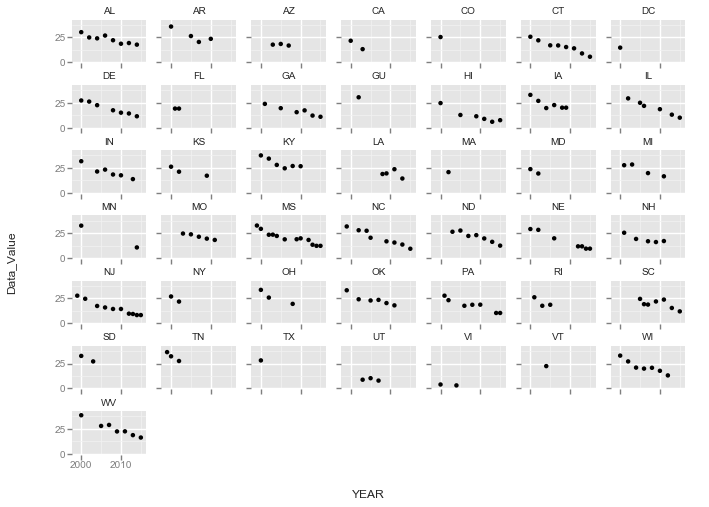

<ggplot: (-9223372036554248069)>

In [88]:
from ggplot import *
#p = ggplot(aes(x='date', y='value'), data=meat_lng)
#p + geom_point() + \
 #   stat_smooth(colour="red") + \
#  facet_wrap("variable")

#p + geom_hist() + facet_wrap("color")

#melt = pd.melt(c_hs_smoker_short, id_vars=['LocationAbbr'])
#melt
p = ggplot(c_hs_smoker_short, aes(x='YEAR', y='Data_Value'))
p + geom_point() + \
    facet_wrap("LocationAbbr")

#p = ggplot(diamonds, aes(x='carat', y='price'))
#p + geom_point(alpha=0.25) + \
 #   facet_grid("cut", "clarity")

In [32]:
# current middle school smoker (overall) by states
c_ms_smoker = current_smoker_df[(current_smoker_df['Education'] == 'Middle School') & (current_smoker_df['Gender'] == 'Overall')]

In [190]:
states = c_hs_smoker['LocationAbbr'].unique().tolist()   # a list of unique states
#print(states)

In [89]:
# no use for now...
#grouped = c_hs_smoker.groupby('LocationAbbr')
#state_dict = {}

#for name, group in grouped:
    #print(name)
    #print(group)
    #state_dict[name] = group



### EDA: Univariate Analysis by Category

Since the two independent variables are _Gender_ and _Education_, we generated some graphs to show how these variables affect our dependent one, **current tobacco usage rate**:

* Current tobacco usage rate based on _Gender_ (_States_ and _Year_ combined)

In [100]:
# by gender
#current_smoker_df = smokingstat_df[(smokingstat_df['Gender'] == 'Female') & (s)]
current_smoker_by_gender = current_smoker_df[current_smoker_df['Gender'].isin(['Female', 'Male'])]
#current_smoker_by_gender.groupby('Gender').agg(np.sum)

In [107]:
sns.set(style="darkgrid")

In [128]:
# Create stripplots of salary by sex and by rank placed next to one another
#g = sns.PairGrid(current_smoker_by_gender,
 #                x_vars=['Gender'],
#               y_vars=["Data_Value"],
             #    aspect=.75, size=7)
#g.map(sns.stripplot, palette="pastel");

In [123]:
# Show salary distributions for males and females in a stripplot (sns.stripplot)
#sns.stripplot(x="Gender", y="Data_Value", data=current_smoker_by_gender, jitter=True);

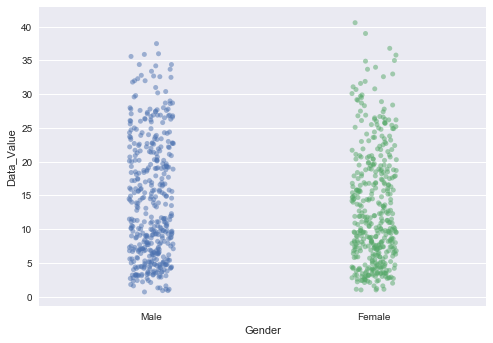

In [118]:
# Show current smoking rate distributions between male and female youth in a stripplot
sns.stripplot(x='Gender', y='Data_Value', data=current_smoker_by_gender, jitter=True, edgecolor='none', alpha=.5)
sns.despine()

* Current tobacco usage rate based on _Education_ (_States_ and _Year_ combined)

In [110]:
# by education
current_smoker_by_education = current_smoker_df[current_smoker_df['Gender'] == 'Overall']


In [122]:
# Create stripplots of salary by sex and by rank placed next to one another
#g = sns.PairGrid(current_smoker_by_education,
                # x_vars=['Education'],
                # y_vars=["Data_Value"],
                # aspect=.75, size=7)
#g.map(sns.stripplot, palette="pastel");

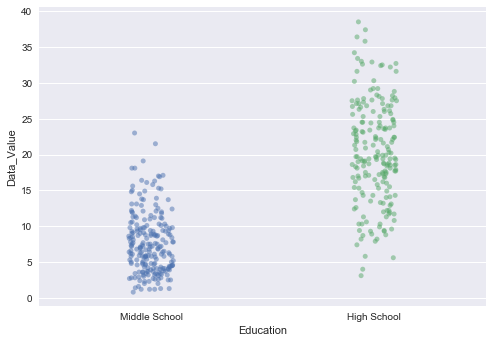

In [119]:
sns.stripplot(x='Education', y='Data_Value', data=current_smoker_by_education, jitter=True, edgecolor='none', alpha=.5)
sns.despine()

### EDA: Bivariate analysis

We used a factorplot in this section to see how our independent variables co-vary with our dependent variable with interest.

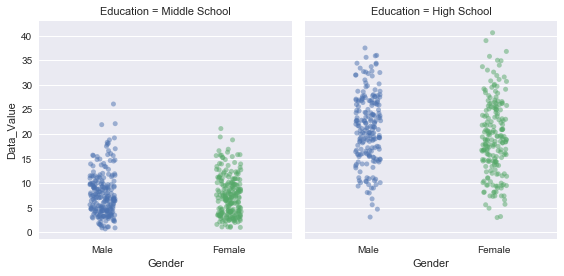

In [127]:
# Create different stripplots of salary (by gender) for each rank
sns.factorplot(x="Gender", y="Data_Value", 
               col="Education", data=current_smoker_by_gender, kind="strip", jitter=True, edgecolor='none', alpha=.5);

In [187]:
# Correlation plot
# plt.matshow(current_smoker_df.corr())
# current_smoker_df.corr()

In [112]:
#from string import letters
#import numpy as np
#import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt

#sns.set(style="white")

# Generate a large random dataset
#rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
 #                columns=list(letters[:26]))

# Compute the correlation matrix
#corr = d.corr()

# Generate a mask for the upper triangle
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
 #           square=True, xticklabels=5, yticklabels=5,
#          linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

### Summary of Insights

From the process of the exploratory data analysis based on our dataset, we indeed have much more indepth understanding in answering our proposed research questions. It is obvious that the current youth tobacco usage rate has been delining throughout the past decade, which holds true on State level within the United States.  
What suprises us is that our dependent variable, **current youth tobacco usage rate** is not largely affected by _Gender_, however it is largely affected by _Education_. From the plots above, we can see that there is a large gap bewteen middle school and high school youth in terms of current tobacco usage, while the data based on _Gender_ does not vary a lot.